In [4]:
import pandas as pd
import numpy as np
import pingouin as pg
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import scipy

Итак, настало время провести свой первый A/B тест.

Задание
Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

In [5]:
df = pd.read_csv('experiment_lesson_4.csv')

In [34]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


Графики распределения и  экспериментальные группы

district
Central     AxesSubplot(0.125,0.11;0.775x0.77)
Purlieus    AxesSubplot(0.125,0.11;0.775x0.77)
Suburb      AxesSubplot(0.125,0.11;0.775x0.77)
Name: delivery_time, dtype: object

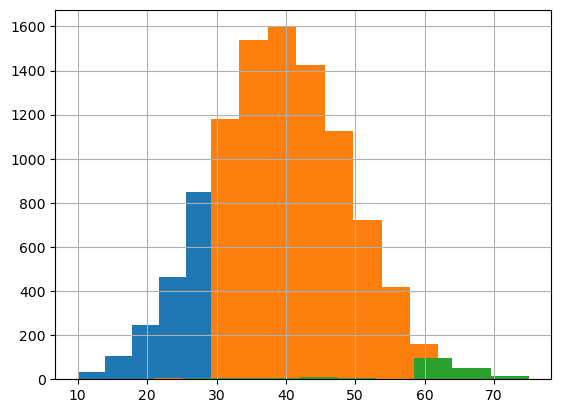

In [7]:
df[df.experiment_group == 'test'].groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.11;0.775x0.77)
Purlieus    AxesSubplot(0.125,0.11;0.775x0.77)
Suburb      AxesSubplot(0.125,0.11;0.775x0.77)
Name: delivery_time, dtype: object

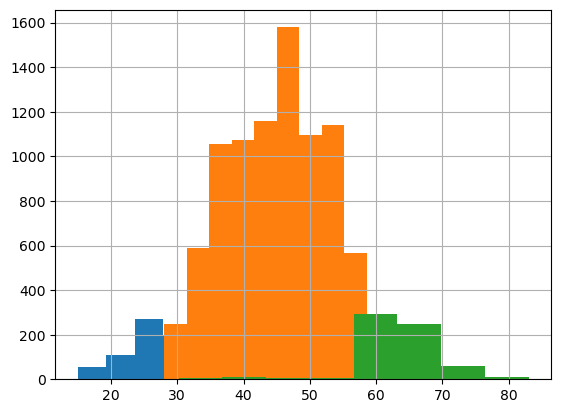

In [8]:
df[df.experiment_group == 'control'].groupby('district').delivery_time.hist()

Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [33]:
df[df.experiment_group == 'test'].shape[0]-df[df.experiment_group == 'control'].shape[0]

12

Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

In [12]:
df[df.experiment_group == 'test'].delivery_time.std()

9.883308351129031

In [13]:
df[df.experiment_group == 'control'].delivery_time.std()

9.990016960247171

In [10]:
pg.normality(data=df,dv='delivery_time',group='experiment_group', method='normaltest')

,W,pval,normal
control,0.253498,0.880955,True
test,7.024157,0.029835,False


Теперь пришло время сравнить средние в тесте и контроле. 

In [16]:
stats.ttest_ind(a = df[df.experiment_group == 'test'].delivery_time,
        b=df[df.experiment_group == 'control'].delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [14]:
pg.ttest(x = df[df.experiment_group == 'test'].delivery_time,
        y=df[df.experiment_group == 'control'].delivery_time)

C:\Users\lbabi\AppData\Roaming\Python\Python39\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-43.035552,20191.127788,two-sided,0.0,"[-6.29, -5.74]",0.605658,inf,1.0


На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

In [27]:
mnc =df[df.experiment_group == 'control'].delivery_time.mean()

In [28]:
mnt = df[df.experiment_group == 'test'].delivery_time.mean()

In [29]:
mnc

45.065101070154576

In [31]:
((mnt - mnc) / mnc) * 100

-13.354653121660812

Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.